## Name: Ahmad Ali Abu-Feilat   

### Importing necessary libraries   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import Dataset

In [2]:
df = pd.read_csv("traffic.csv")
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [13]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Hour
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,11.50000
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,6.92335
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.00000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,5.75000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,11.50000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,17.25000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,23.00000


### 1- Vehicle Distribution Analysis:

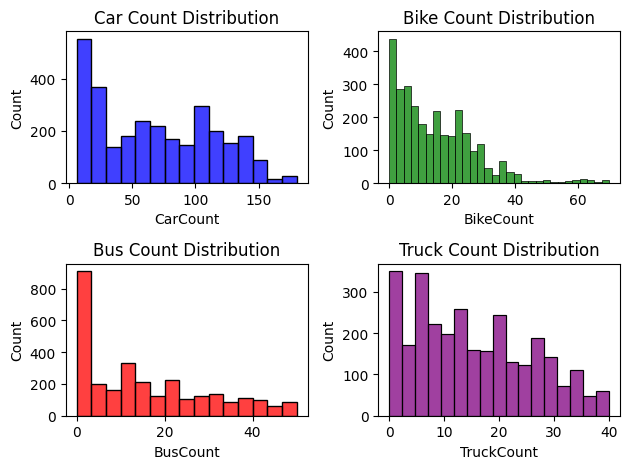

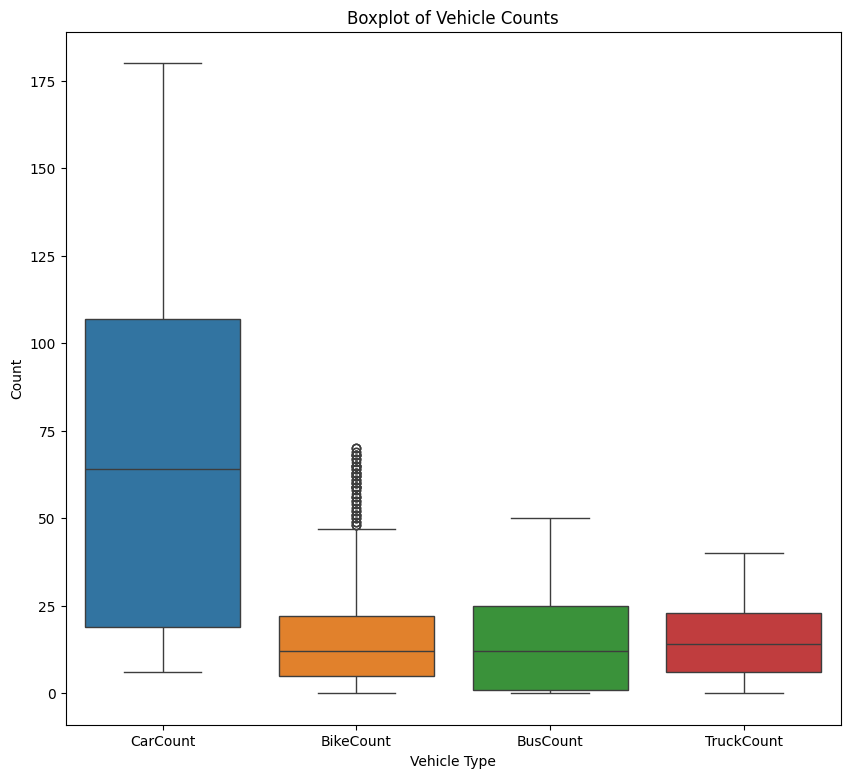

In [4]:

fig, axes = plt.subplots(2, 2)

# Car [0,0] plot in position top left
sns.histplot(df["CarCount"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Car Count Distribution")

# Bike [0,1] top right
sns.histplot(df["BikeCount"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Bike Count Distribution")

# Bus [1,0] bottom left
sns.histplot(df["BusCount"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Bus Count Distribution")

# Truck [1,1] bottom right
sns.histplot(df["TruckCount"],ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Truck Count Distribution")

plt.tight_layout() # adjusts the spacing between subplots automatically
plt.show()

# Create boxplots
plt.figure(figsize=(10, 9))
sns.boxplot(data=df[["CarCount", "BikeCount", "BusCount", "TruckCount"]])
plt.title("Boxplot of Vehicle Counts")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


### 2-Traffic Situation Distribution

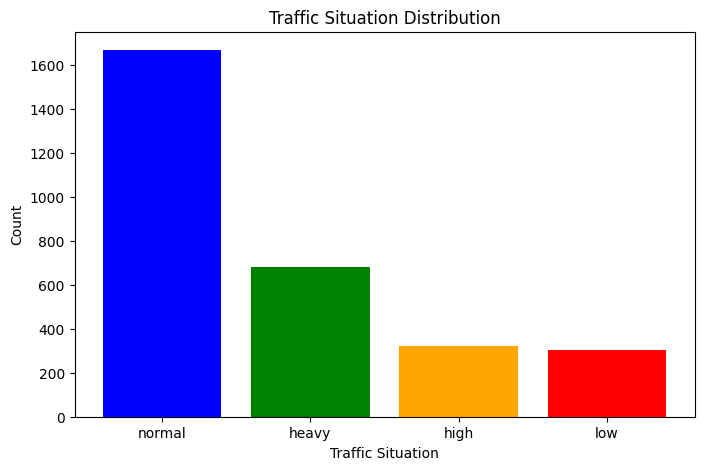

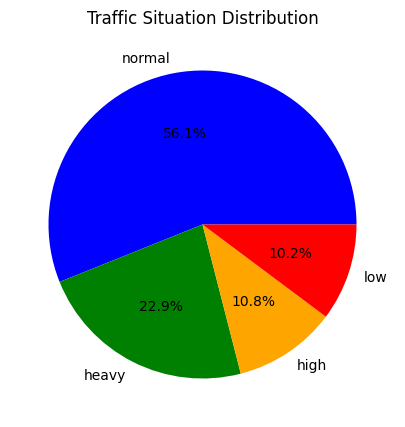

In [5]:
traffic_counts = df["Traffic Situation"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(traffic_counts.index, traffic_counts.values, color=["blue", "green", "orange", "red"])
plt.title("Traffic Situation Distribution")
plt.xlabel("Traffic Situation")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))

# (autopct='%1.1f%%') for show percentages on the pie chart
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', colors=["blue", "green", "orange", "red"])
plt.title("Traffic Situation Distribution")
plt.show()


### 3- Variation by Day of the Week

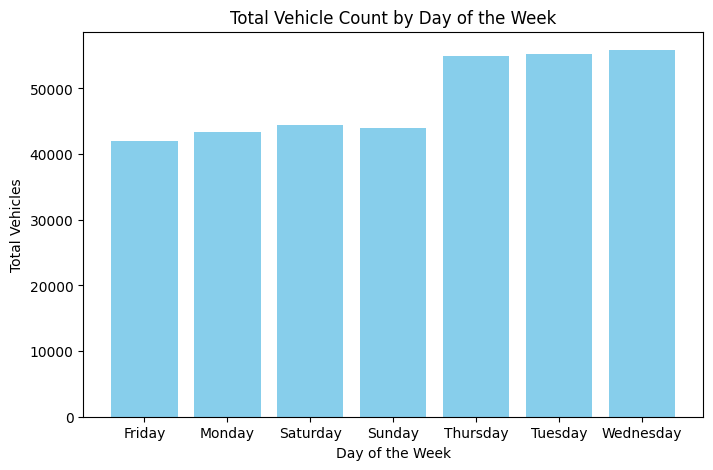

In [6]:
# Group by day and sum vehicle counts
day_counts = df.groupby("Day of the week")["Total"].sum()

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(day_counts.index, day_counts.values, color="skyblue")
plt.title("Total Vehicle Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Vehicles")
plt.show()


### 4- Car Count vs. Traffic Situation


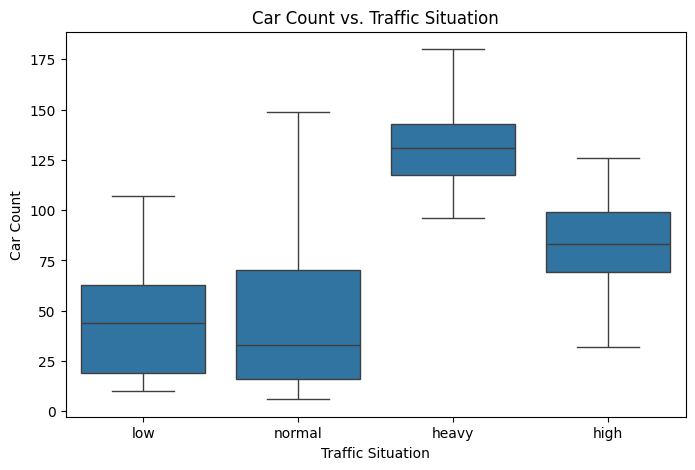

In [7]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=df["Traffic Situation"], y=df["CarCount"])
plt.title("Car Count vs. Traffic Situation")
plt.xlabel("Traffic Situation")
plt.ylabel("Car Count")
plt.show()


### 5- Bike Count vs. Traffic Situation


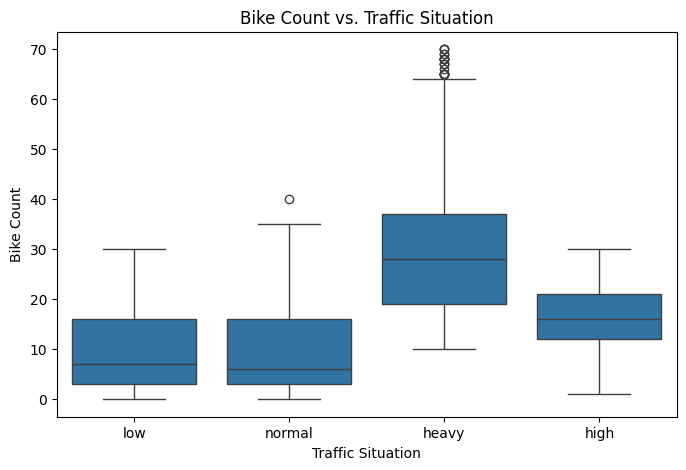

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Traffic Situation"], y=df["BikeCount"])
plt.title("Bike Count vs. Traffic Situation")
plt.xlabel("Traffic Situation")
plt.ylabel("Bike Count")
plt.show()


### 6- Bus Count vs. Traffic Situation


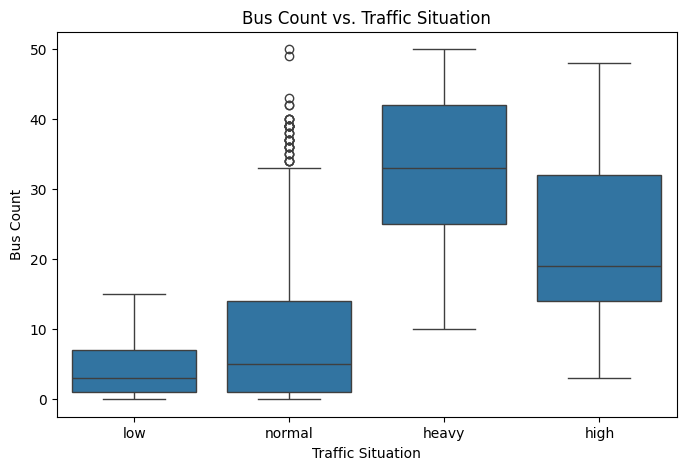

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Traffic Situation"], y=df["BusCount"])
plt.title("Bus Count vs. Traffic Situation")
plt.xlabel("Traffic Situation")
plt.ylabel("Bus Count")
plt.show()


### 7- Truck Count vs. Traffic Situation


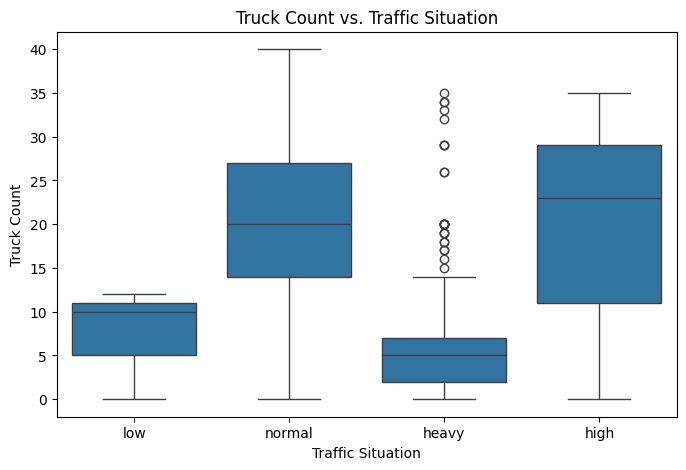

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Traffic Situation"], y=df["TruckCount"])
plt.title("Truck Count vs. Traffic Situation")
plt.xlabel("Traffic Situation")
plt.ylabel("Truck Count")
plt.show()


### 8- Total Vehicle and Count Traffic Situation


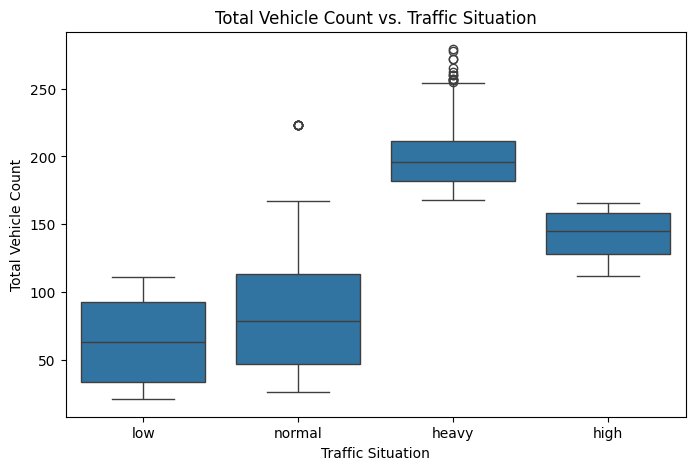

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Traffic Situation"], y=df["Total"])
plt.title("Total Vehicle Count vs. Traffic Situation")
plt.xlabel("Traffic Situation")
plt.ylabel("Total Vehicle Count")
plt.show()


### 9- Busiest Hours of the Day (ChatGPT)

C:\Users\feila\AppData\Local\Temp\ipykernel_43144\2065671692.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="magma")


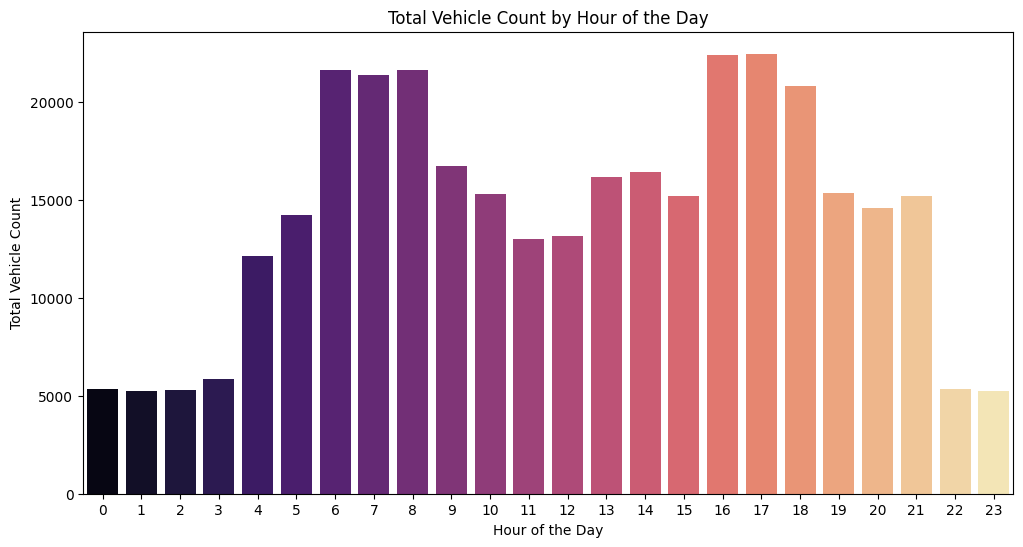

In [12]:
# Convert Time to datetime format and extract the hour
df["Hour"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.hour

# Group by hour and sum vehicle counts
hourly_counts = df.groupby("Hour")["Total"].sum()

# Plot the busiest hours
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="magma")
plt.title("Total Vehicle Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Vehicle Count")
plt.xticks(range(0, 24))
plt.show()
